# Introduction to IRIS Dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import seaborn as sns
import matplotlib.pyplot as plt

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
df= pd.read_csv('../input/iris/Iris.csv')
df1=df.copy()
df

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 6 columns]

So what is this petal Length Cm and all  
and what is **sepal** and **petal**  


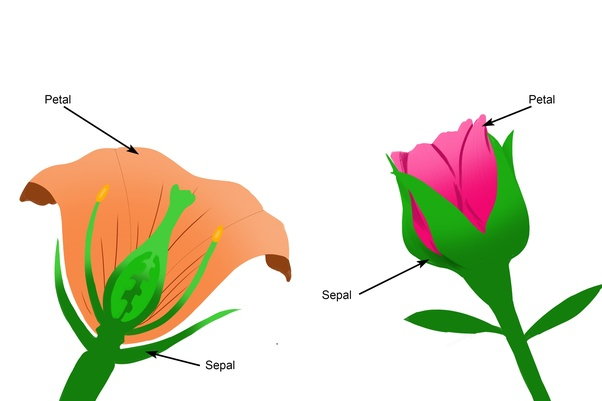

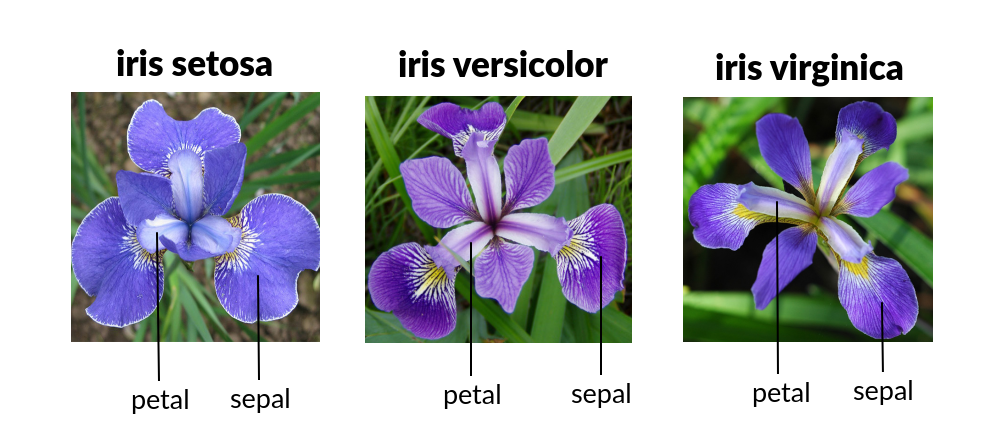

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.describe(include='all')

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
count   150.000000     150.000000    150.000000     150.000000    150.000000   
unique         NaN            NaN           NaN            NaN           NaN   
top            NaN            NaN           NaN            NaN           NaN   
freq           NaN            NaN           NaN            NaN           NaN   
mean     75.500000       5.843333      3.054000       3.758667      1.198667   
std      43.445368       0.828066      0.433594       1.764420      0.763161   
min       1.000000       4.300000      2.000000       1.000000      0.100000   
25%      38.250000       5.100000      2.800000       1.600000      0.300000   
50%      75.500000       5.800000      3.000000       4.350000      1.300000   
75%     112.750000       6.400000      3.300000       5.100000      1.800000   
max     150.000000       7.900000      4.400000       6.900000      2.500000   

            Species  
count           150  
unique            3  
top     Iris-setosa  
freq             50  
mean            NaN  
std             NaN  
min             NaN  
25%             NaN  
50%             NaN  
75%             NaN  
max             NaN

**What is STD?**  
Standard deviation measures the spread of a data distribution. It measures the typical distance between each data point and the mean.

***What is IQR?***   
interquartile range (IQR) is a `measure of statistical dispersion`, which is the spread of the data.

***What is Outlier?***   
Outliers here are defined as observations that fall below Q1 − 1.5 IQR or above Q3 + 1.5 IQR. Or outlier is a data point that differs significantly from other observations

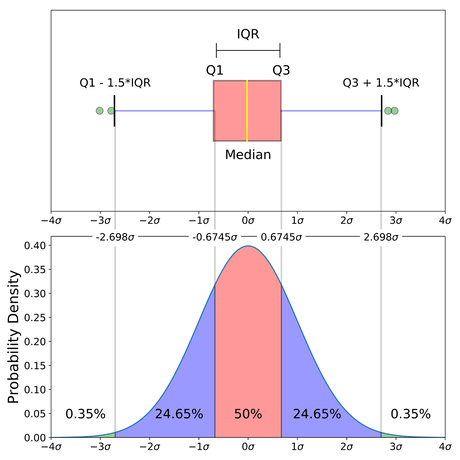

**What is percentile  **

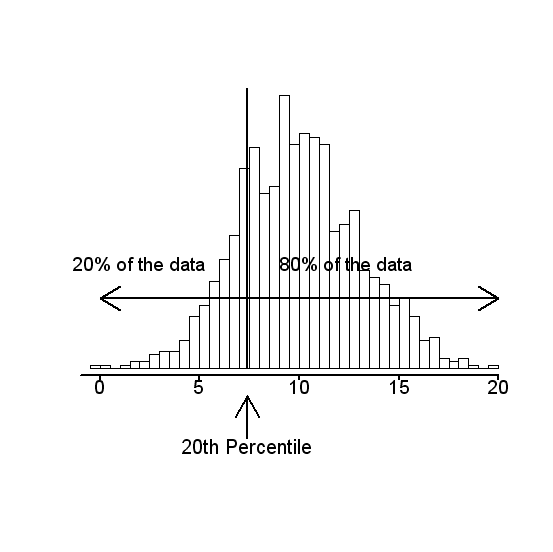

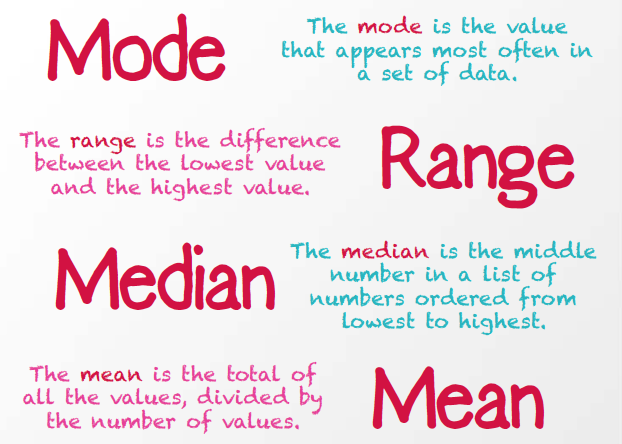

***Why do we square and then under root in std?*** [Source: Quora](https://www.quora.com/We-use-square-and-square-root-to-find-standard-deviation-but-why-not-use-a-cube-and-root-cube)    
There is a short way and a longer way to answer this question. The short answer is that the point of squaring the difference between a sample value and the sample mean is so that deviations in either direction count in the same direction. In other words, having one sample 3 under and another sample 3 over the mean would cancel rather than accumulate as is needed for a measure of deviation. Cubing the difference would not remedy the cancellation / accumulation problem, but squaring does.

Why not use the absolute value, which would remedy the sign (+/-) problem described above, without transforming the data by squaring it? I don't know, and have wondered that myself. It could be that a square transform has some properties that are favorable for particular purposes but I don't know what those considerations might be. Conceptually the absolute value would be more transparent than a square, but a statistician would need to answer that.

Plainly though, the cube simply would not provide a valid measure of deviation because different directions would cancel each other rather than accumulate.

In [5]:
df.duplicated().sum()

0

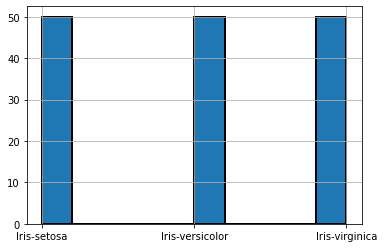

In [6]:
df.Species.hist(edgecolor='black', linewidth=2);

In [7]:
## df.isnull()
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df.notna().mean()*100

Id               100.0
SepalLengthCm    100.0
SepalWidthCm     100.0
PetalLengthCm    100.0
PetalWidthCm     100.0
Species          100.0
dtype: float64

Checking for **Skew** and **Kurt**  
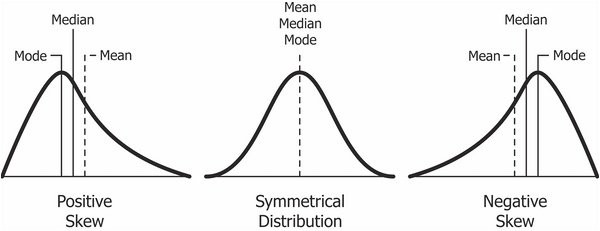

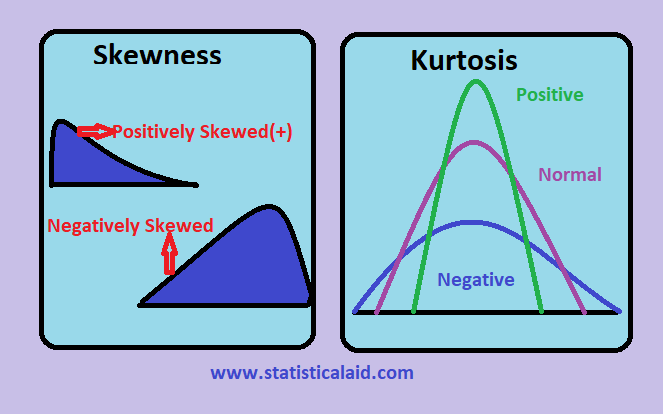

In [9]:
df.skew()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Id               0.000000
SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

### Effects of skewness
Real life distributions are usually skewed. If there are too much skewness in the data, then many statistical model don’t work but why.

**So in skewed data, the tail region may act as an outlier for the statistical model and we know that outliers adversely affect the model’s performance especially regression-based models.** 
There are statistical model that are robust to outlier like a Tree-based models but it will limit the possibility to try other models. So there is a necessity to transform the skewed data to close enough to a Gaussian distribution or Normal distribution. This will allow us to try more number of statistical model.

### How to solve for Skewness in 
**Log transformation:**  
***A log transformation can help to fit a very skewed distribution into a Gaussian one.*** After log transformation we can easily see pattern in our data.

In [10]:
### axis =1 for columns
## Axis =0 for rows

df.drop('Id', axis=1, inplace=True)

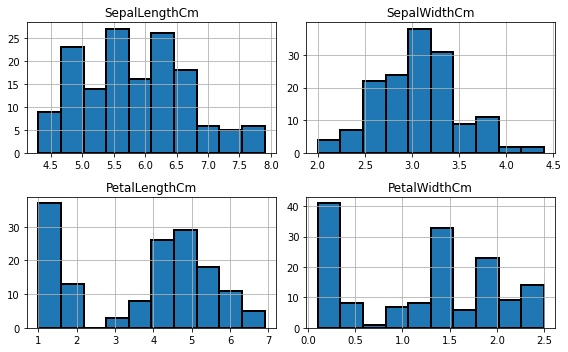

In [11]:
df.hist(edgecolor='Black', linewidth=2, figsize=(8,5));
plt.tight_layout()

`NOTE: How histogram is different from barplot`  
Unlike a bar chart, the area of a bar in a histogram represents the frequency, not the height. The frequency is calculated by multiplying the width of the bin by the height. The height of a bar in a histogram indicates frequency (counts) only if the bin widths are evenly spaced. For example, if you are plotting magnitudes of earthquakes and your bins are 3-5, 5-7 and 7-9, each bin is spaced two numbers apart and so the height of the bar would equal the frequency. However, histograms don’t always have even bins. When a histogram has uneven bins, the height does not equal the frequency.

*     The Highest frequency of sepal width is between 3.0 to 3.5 which is around 70.
*     The Highest frequency of sepal length is between 5.5 and 6.0 which is around 35.
*     The Highest frequency of petal width is between 0 to 0.5 which is around 50.
*     The Highest frequency of petal length is between 0 to 0.5 which is around 50.

In [12]:
import warnings
warnings.filterwarnings('ignore')

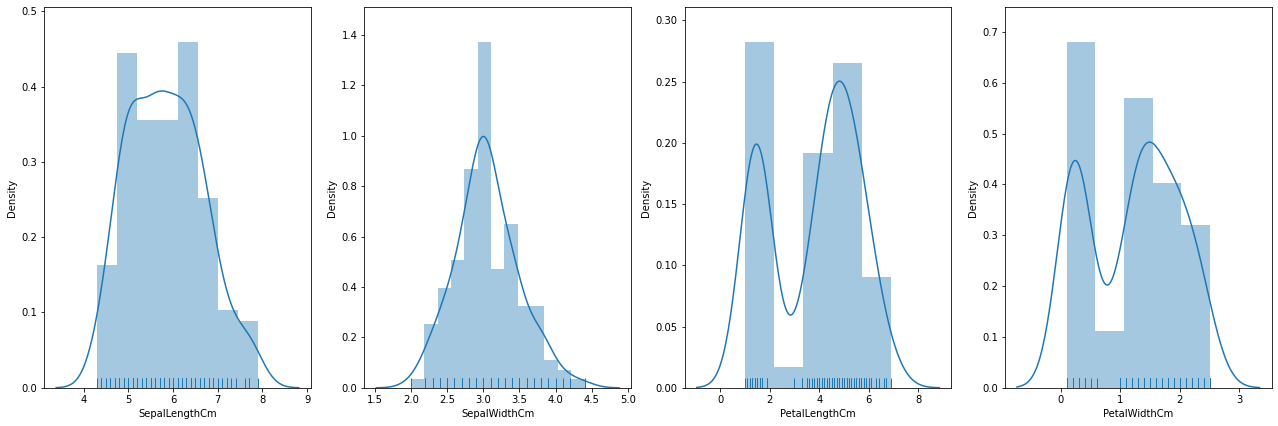

In [13]:
j= 1
plt.figure(figsize=(22,7))
for i in df.select_dtypes('number'):
    plt.subplot(1,4,j)
    sns.distplot(df[i], rug=True );
    j= j+1
plt.show()

[Read more about distribution functions on](https://www.analyticsvidhya.com/blog/2021/07/probability-types-of-probability-distribution-functions/)

In [14]:
df.kurt()

SepalLengthCm   -0.552064
SepalWidthCm     0.290781
PetalLengthCm   -1.401921
PetalWidthCm    -1.339754
dtype: float64

### What is Kurtosis?
Like skewness, `kurtosis is a statistical measure that is used to describe distribution.` Whereas *skewness differentiates extreme values in one versus the other tail,* ***kurtosis measures extreme values in either tail. Distributions with large kurtosis exhibit tail data exceeding the tails of the normal distribution*** (e.g., five or more standard deviations from the mean). **Distributions with low kurtosis exhibit tail data that are `generally less extreme` than the tails of the normal distribution.**

# Vizualization with Seaborn

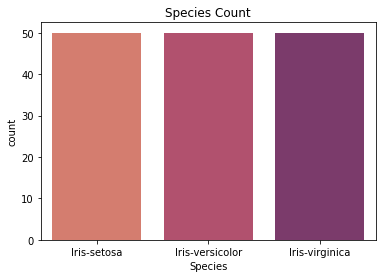

In [15]:
plt.title('Species Count')
sns.countplot(df['Species'], palette='flare');

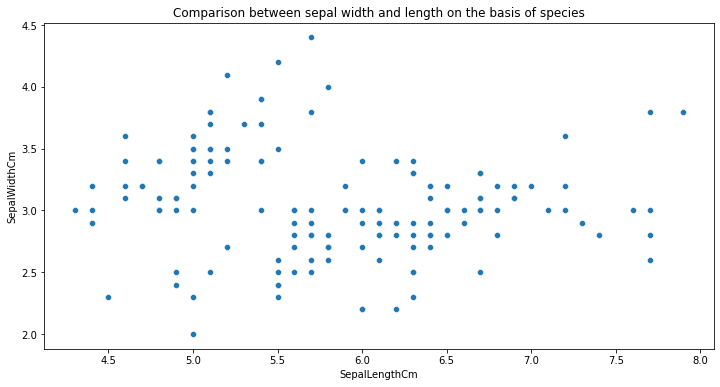

In [16]:
plt.figure(figsize=(12,6))
plt.title('Comparison between sepal width and length on the basis of species')
sns.scatterplot(df['SepalLengthCm'], df['SepalWidthCm']);

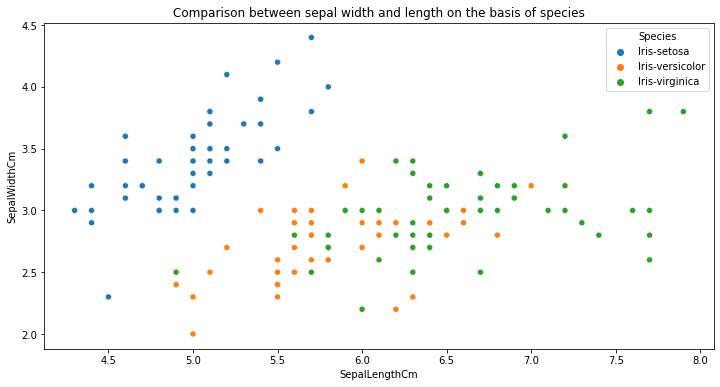

In [17]:
plt.figure(figsize=(12,6))
plt.title('Comparison between sepal width and length on the basis of species')
sns.scatterplot(df['SepalLengthCm'], df['SepalWidthCm'], hue = df['Species']);

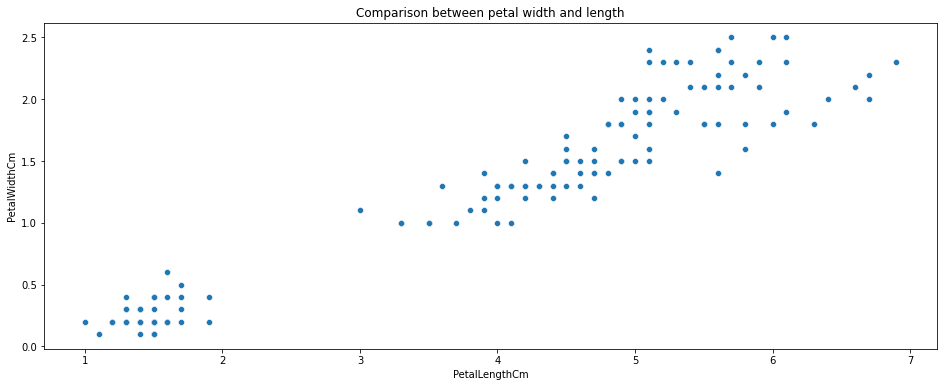

In [18]:
plt.figure(figsize=(16,6))
plt.title('Comparison between petal width and length')
sns.scatterplot(df['PetalLengthCm'], df['PetalWidthCm']);

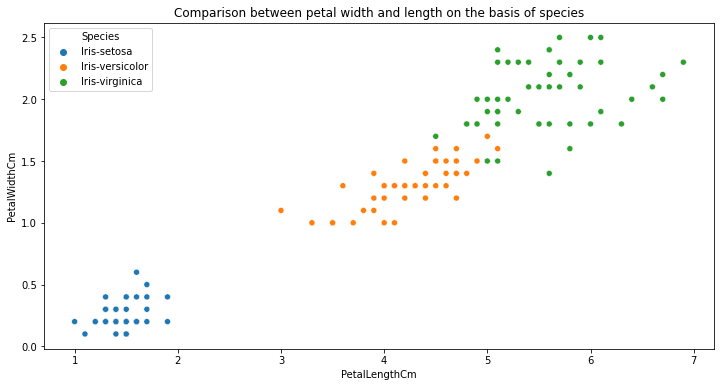

In [19]:
plt.figure(figsize=(12,6))
plt.title('Comparison between petal width and length on the basis of species')
sns.scatterplot(df['PetalLengthCm'], df['PetalWidthCm'], hue = df['Species']);

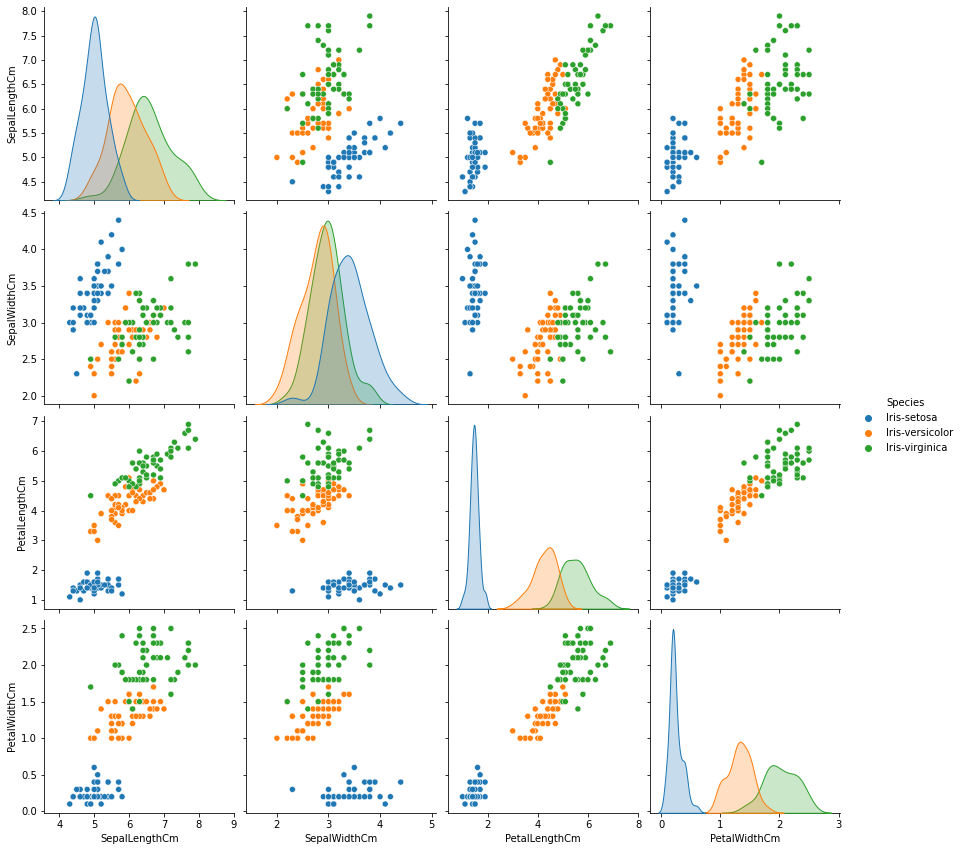

In [20]:
sns.pairplot(df,hue="Species",height=3);

### Correlation Between Variables
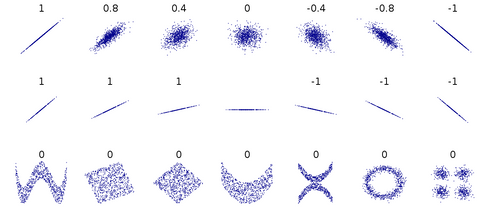

In [21]:
df.corr()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000

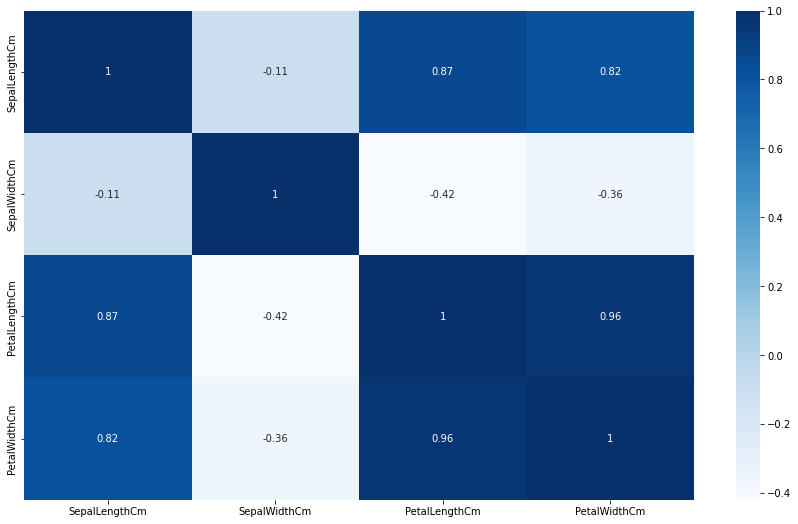

In [22]:
fig = plt.figure(figsize = (15,9))
sns.heatmap(df.corr(), cmap='Blues', annot = True);

## Univariate Analysis of our columns
Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn't deal with causes or relationships (unlike regression ) and it's major purpose is to describe; It takes data, summarizes that data and finds patterns in the data.

### **FacetGrid**  
sns.FacetGrid(df, col='Species').map(sns.histplot, 'SepalLengthCm')  
sns.FacetGrid(df, hue='Species',height=5).map(sns.histplot, 'SepalLengthCm')  

### 1. Setup FacetGrid
sns.FacetGrid()  
### 2. Specify plot type
g.map()  
g.map_dataframe()  
### 3. Customise FacetGrid using `Methods and Attributes` of FacetGrid

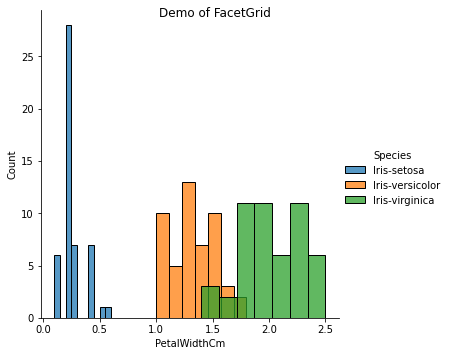

In [23]:
g= sns.FacetGrid(df, hue='Species', height=5).map(sns.histplot,'PetalWidthCm').add_legend();
g.fig.suptitle('Demo of FacetGrid');

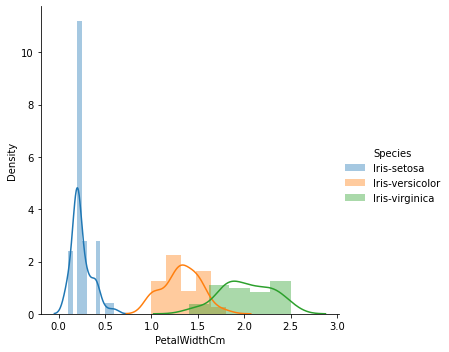

In [24]:
sns.FacetGrid(df,hue="Species",height=5).map(sns.distplot,"PetalWidthCm").add_legend();

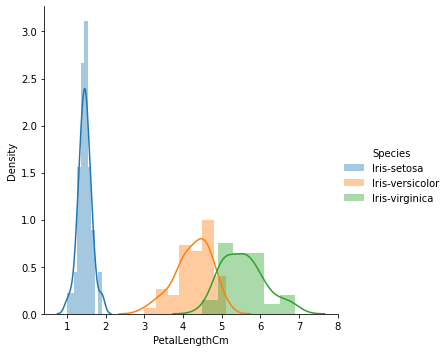

In [25]:
sns.FacetGrid(df,hue="Species",height=5).map(sns.distplot,"PetalLengthCm").add_legend();

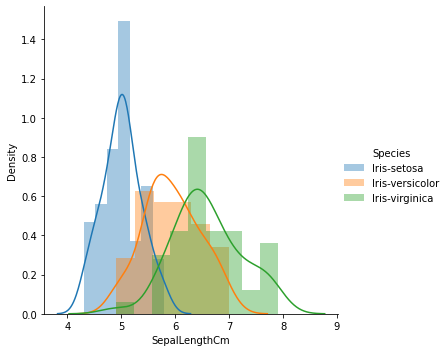

In [26]:
sns.FacetGrid(df,hue="Species",height=5).map(sns.distplot,"SepalLengthCm").add_legend();

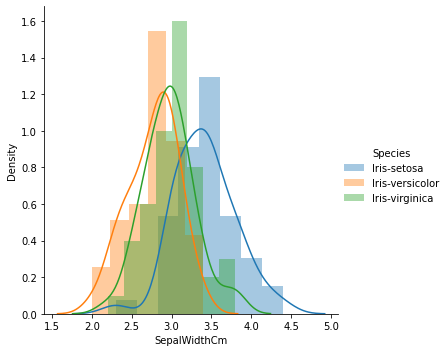

In [27]:
sns.FacetGrid(df,hue="Species",height=5).map(sns.distplot,"SepalWidthCm").add_legend();

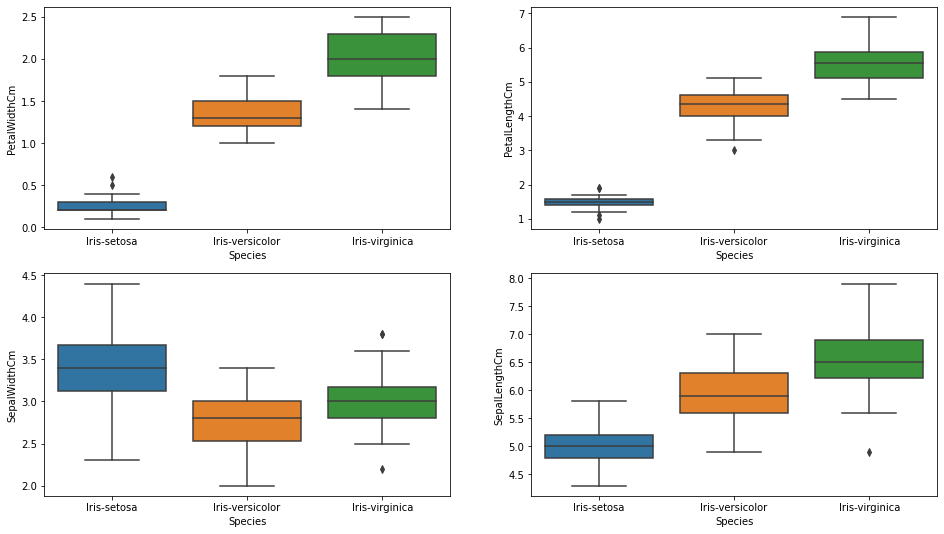

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot(  y="PetalWidthCm",  x= "Species", data=df,  orient='v' , ax=axes[0, 0])
sns.boxplot(  y="PetalLengthCm", x= "Species", data=df,  orient='v' , ax=axes[0, 1])
sns.boxplot(  y="SepalWidthCm",  x= "Species", data=df,  orient='v' , ax=axes[1, 0])
sns.boxplot(  y="SepalLengthCm", x= "Species", data=df,  orient='v' , ax=axes[1, 1])
plt.show()

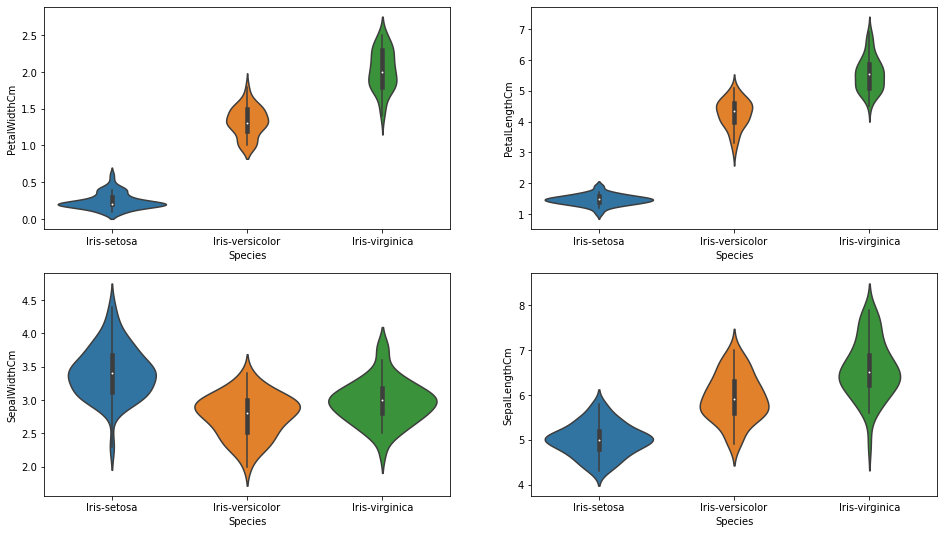

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.violinplot(y="PetalWidthCm",  x= "Species", data=df,  orient='v' , ax=axes[0, 0])
sns.violinplot(y="PetalLengthCm", x= "Species", data=df,  orient='v' , ax=axes[0, 1])
sns.violinplot(y="SepalWidthCm",  x= "Species", data=df,  orient='v' , ax=axes[1, 0])
sns.violinplot(y="SepalLengthCm", x= "Species", data=df,  orient='v' , ax=axes[1, 1])
plt.show()

# Conclusion from Data Analysis

*     The dataset is balanced i.e. equal records are present for all three species.
*     We have four numerical columns while just one categorical column which in turn is our target column.
*     A strong correlation is present between petal width and petal length.
*     The setosa species is the most easily distinguishable because of its small feature size.
*     The Versicolor and Virginica species are usually mixed and are sometimes hard to separate, while usually Versicolor has average feature sizes and virginica has larger feature sizes.
* Petal Length and width can help us predict label easily

# Decision Tree
`Note:` This is not the way to create model, I am using DT for analysis purpose only.

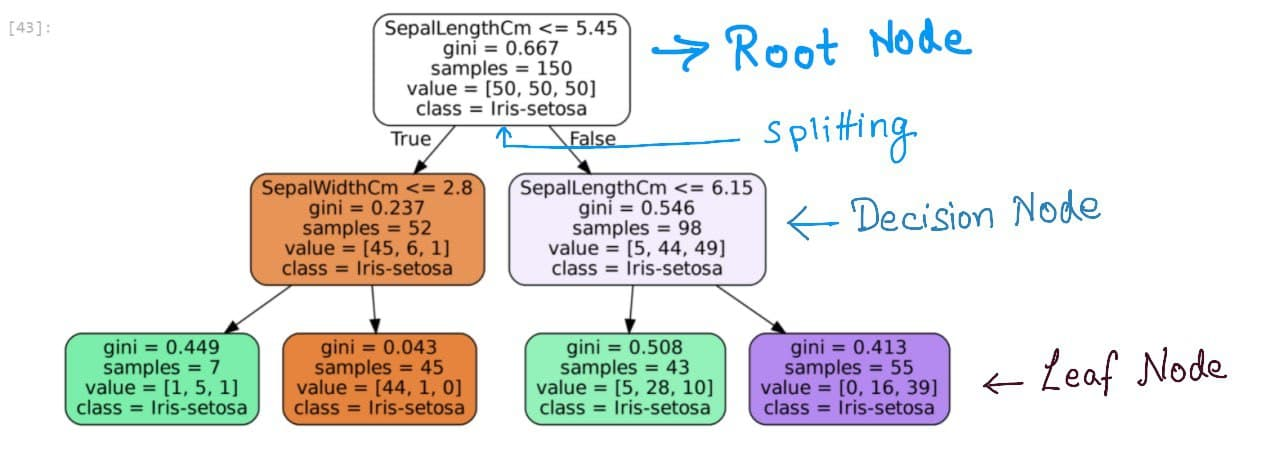

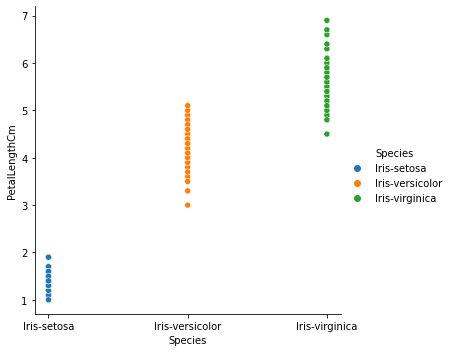

In [30]:
sns.relplot(y="PetalLengthCm",  x= "Species", data=df,  hue='Species');

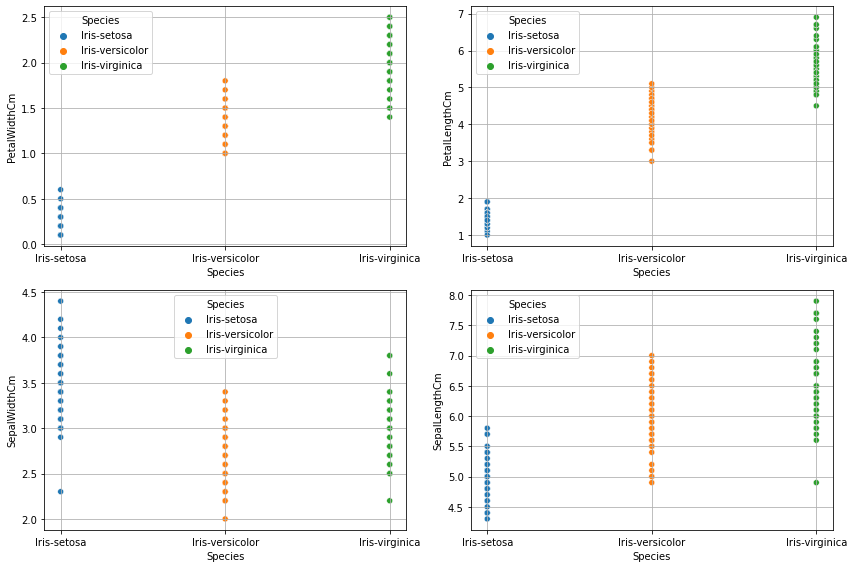

In [31]:
### Another way to for subplot ###

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.scatterplot(y="PetalWidthCm",  x= "Species", data=df,  hue='Species')
plt.grid(True)
plt.subplot(2,2,2)
sns.scatterplot(y="PetalLengthCm",  x= "Species", data=df,  hue='Species')
plt.grid(True)
plt.subplot(2,2,3)
sns.scatterplot(y="SepalWidthCm",  x= "Species", data=df,  hue='Species')
plt.grid(True)
plt.subplot(2,2,4)
sns.scatterplot(y="SepalLengthCm",  x= "Species", data=df,  hue='Species')
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
##### For the time being lets only use PetalLength and PetalWidth only #####

y= df.pop('Species')
x= df.iloc[:, 2:]
display(y.sample(5))
print('training dataset')
display(x.sample(5))

111     Iris-virginica
73     Iris-versicolor
133     Iris-virginica
77     Iris-versicolor
37         Iris-setosa
Name: Species, dtype: object

training dataset


PetalLengthCm  PetalWidthCm
63            4.7           1.4
14            1.2           0.2
68            4.5           1.5
38            1.3           0.2
12            1.4           0.1

### Before training a model we must **split the dataset** but I haven't because I am using DT for analysis not prediction.

In [34]:
### Defining a decision Tree Model
tree_clf1= DecisionTreeClassifier(max_depth=2)

In [35]:
### Fiting the model on dataset
tree_clf1.fit(x,y)

DecisionTreeClassifier(max_depth=2)

## Ploting the decision tree

In [36]:
!pip install graphviz

In [37]:
from sklearn.tree import export_graphviz

In [38]:
export_graphviz(
            tree_clf1,
            out_file='tree.dot',
            feature_names=df.columns[2:],
            class_names=df1.Species,
            rounded=True,
            filled=True
        )

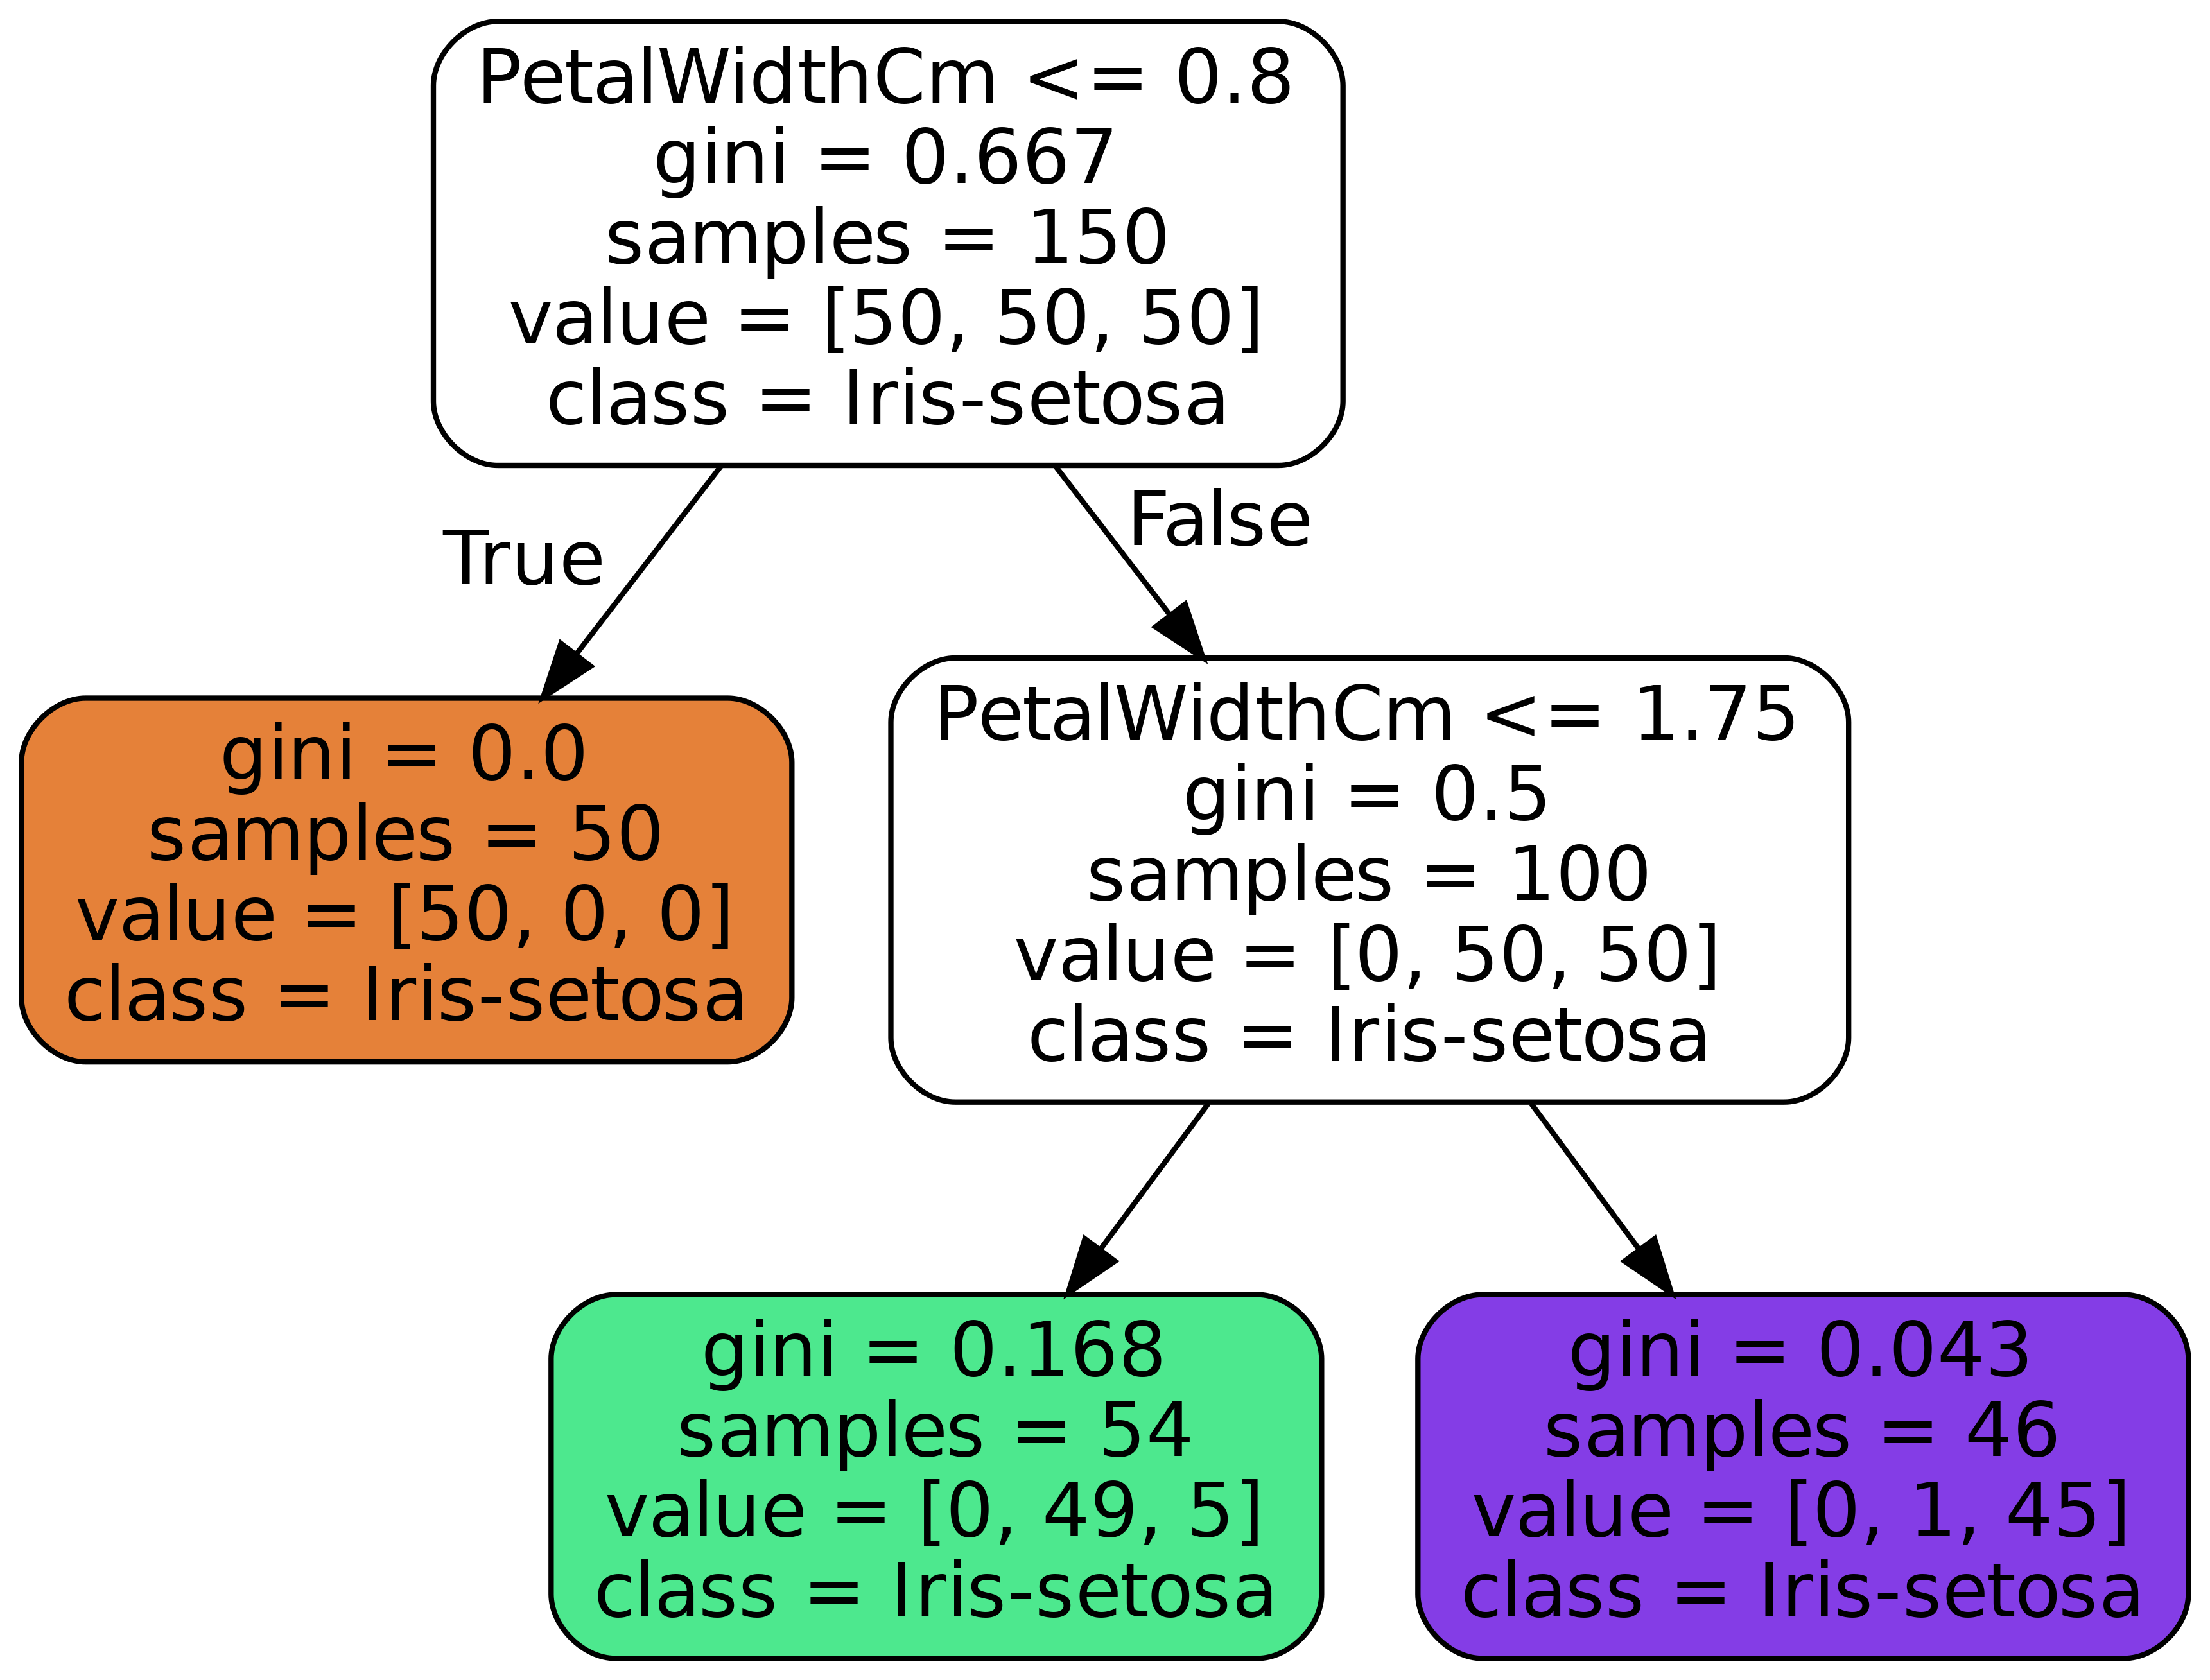

In [39]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png',width = 400, height = 200)

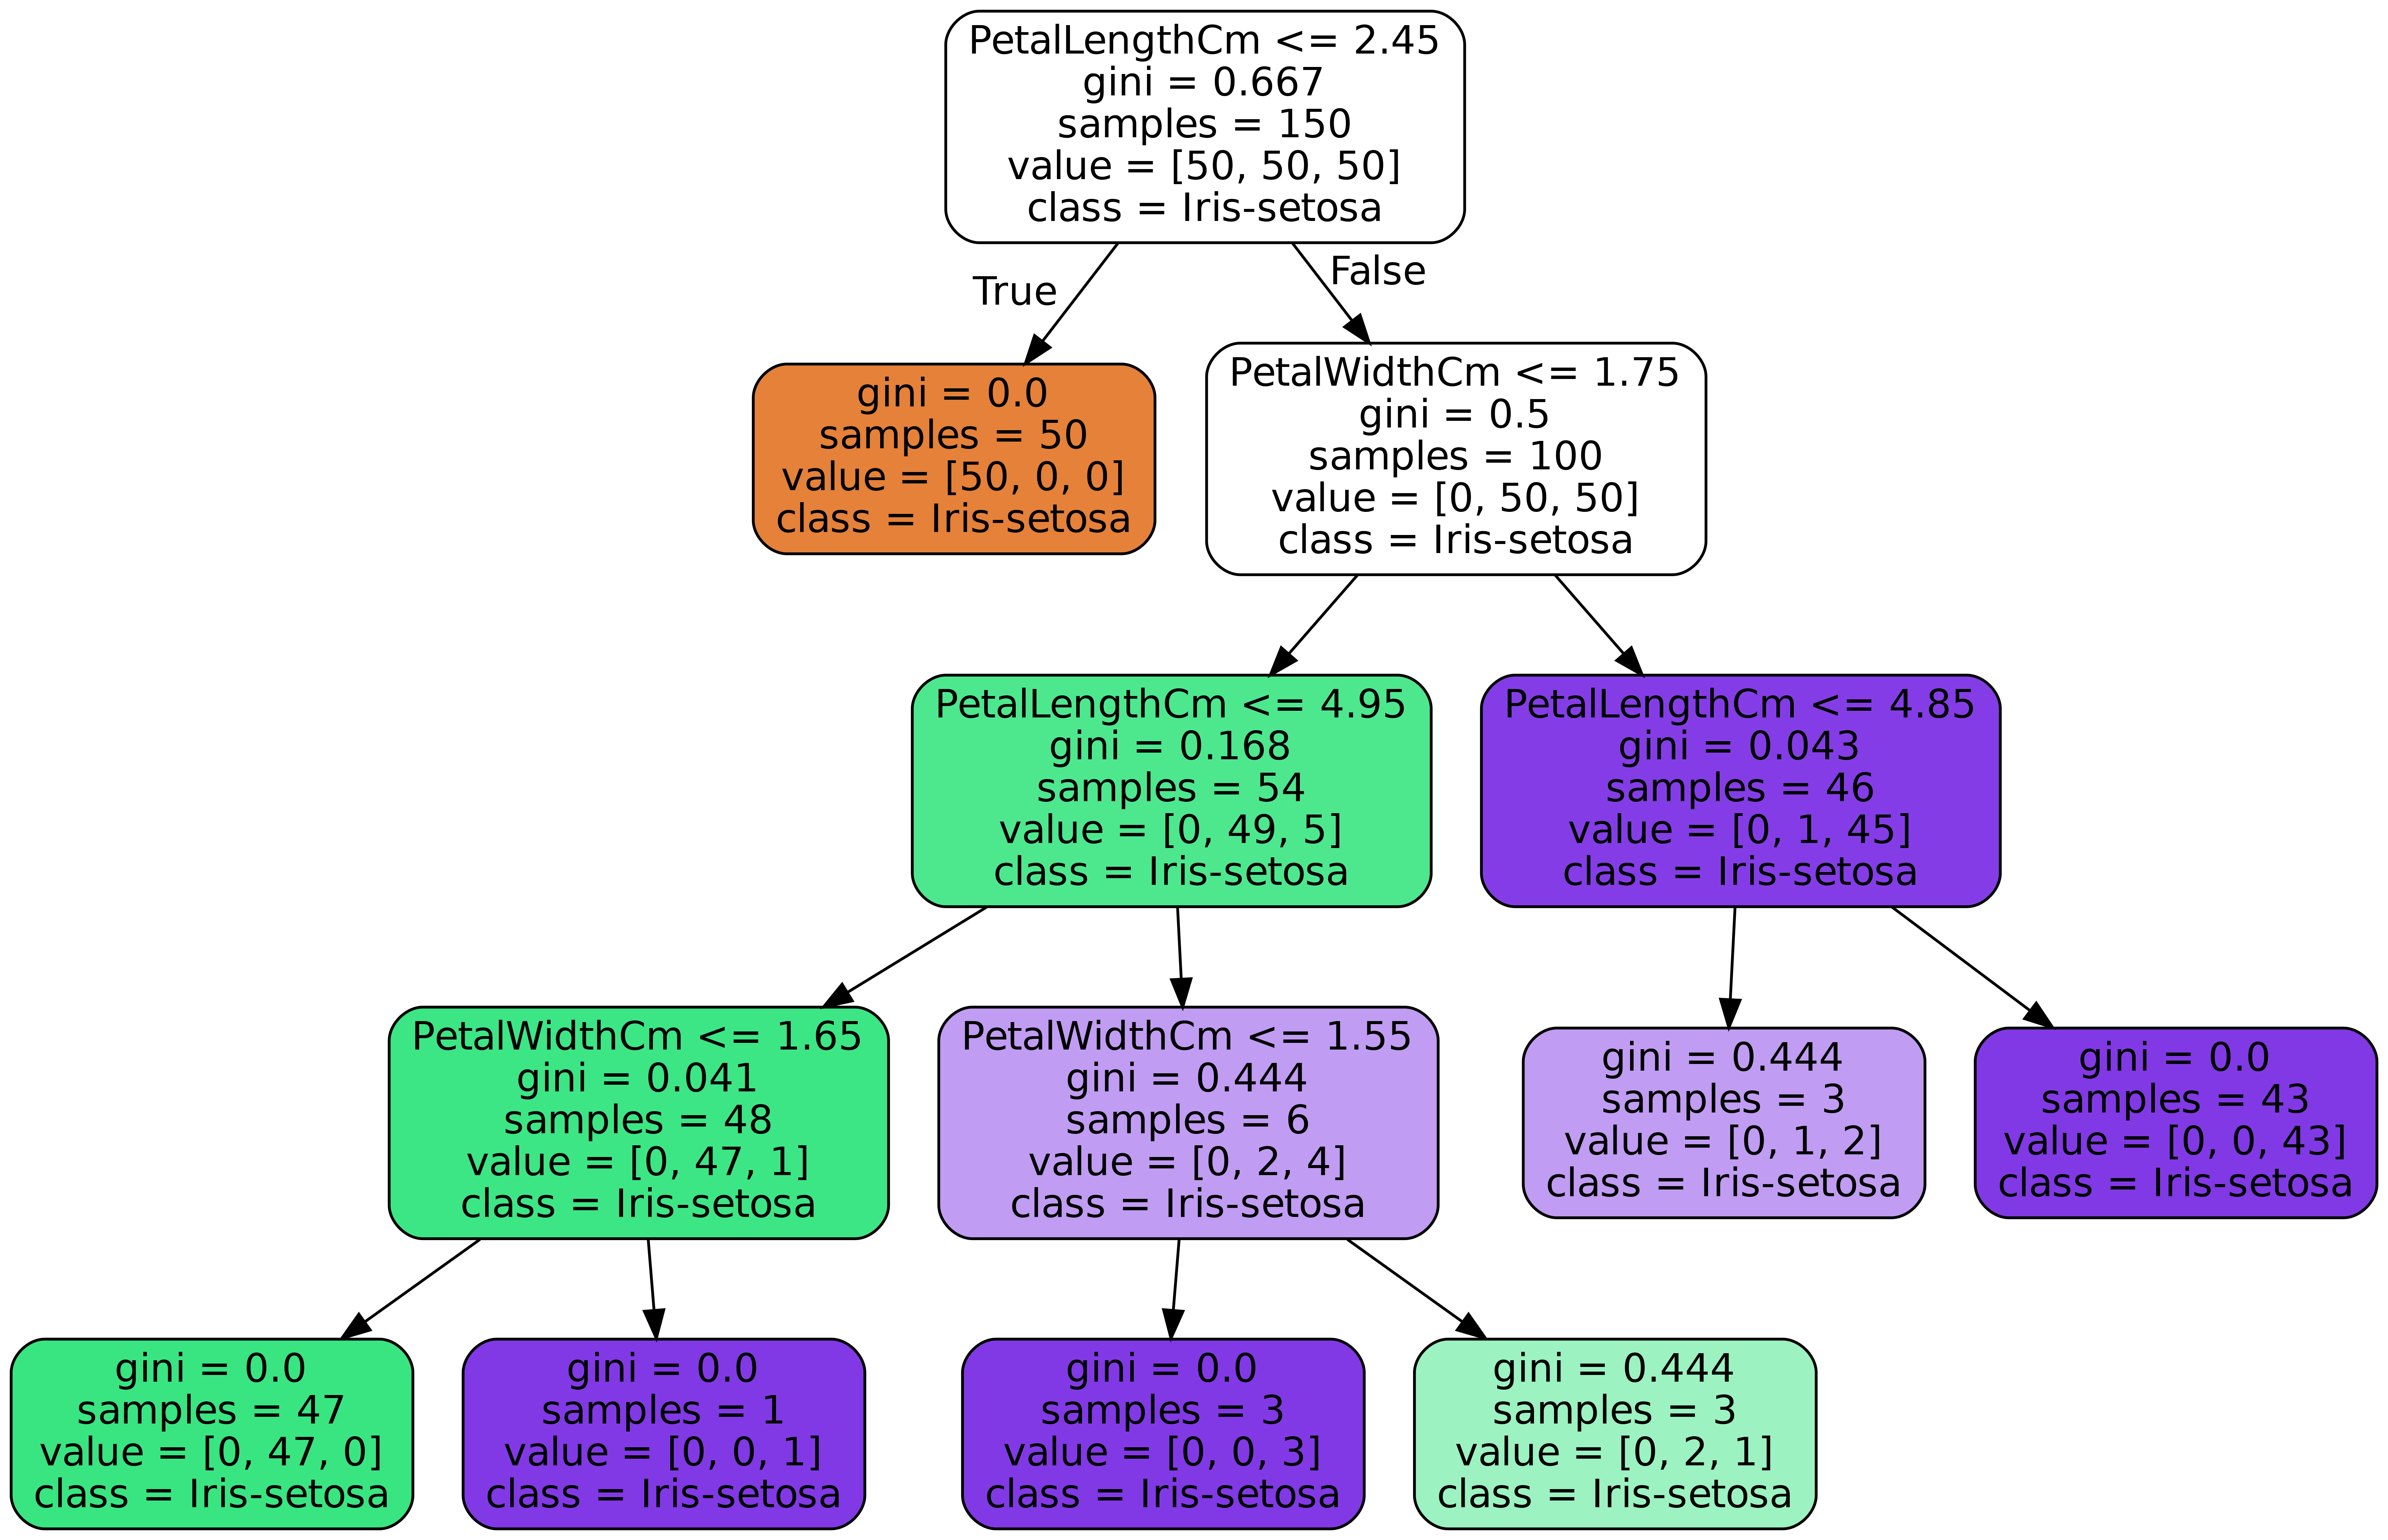

In [40]:
### Now will perform same thing for petal but with depth = 4

### Defining a decision Tree Model
tree_clf1D= DecisionTreeClassifier(max_depth=4)
### Fiting the model on dataset
tree_clf1D.fit(x,y)

export_graphviz(
            tree_clf1D,
            out_file='tree-depth4.dot',
            feature_names=df.columns[2:],
            class_names=df1.Species,
            rounded=True,
            filled=True
        )

from subprocess import call
call(['dot', '-Tpng', 'tree-depth4.dot', '-o', 'tree-depth4.png', '-Gdpi=600'])

# Display in jupyter notebook
Image(filename = 'tree-depth4.png')

y being same

training dataset for Sepal


SepalLengthCm  SepalWidthCm
36             5.5           3.5
115            6.4           3.2
98             5.1           2.5
29             4.7           3.2
145            6.7           3.0

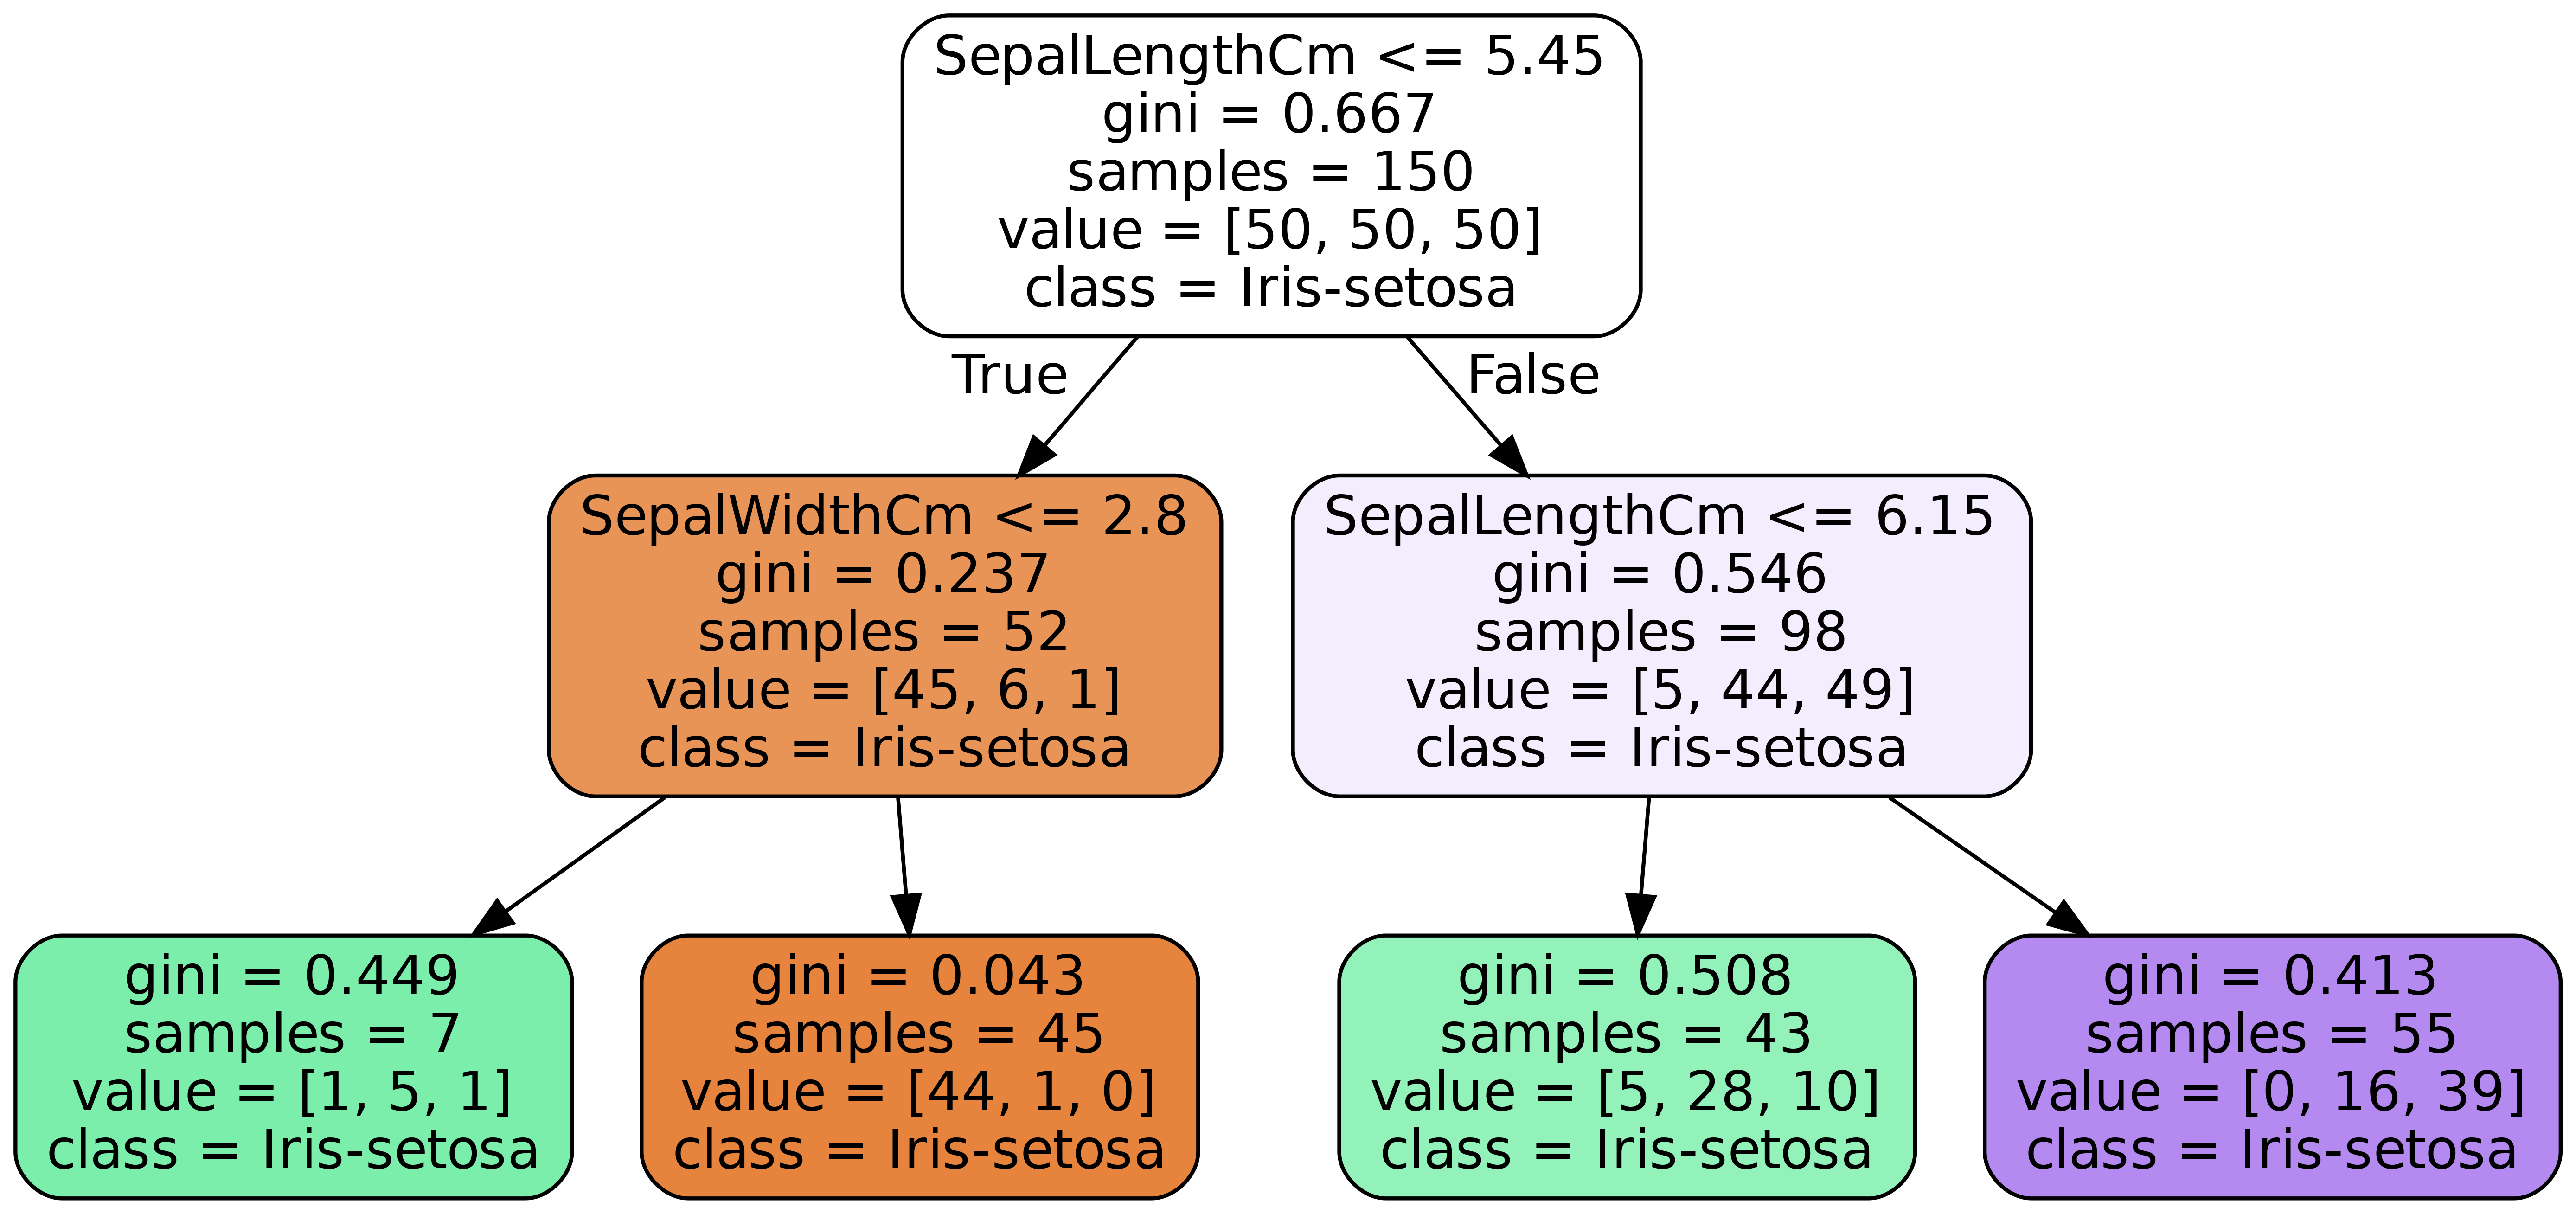

In [41]:
### Now will perform same thing for sepal
x1= df.iloc[:, 0:2]
print('y being same')
print()
print('training dataset for Sepal')
display(x1.sample(5))


### Defining a decision Tree Model
tree_clf2= DecisionTreeClassifier(max_depth=2)
### Fiting the model on dataset
tree_clf2.fit(x1,y)


export_graphviz(
            tree_clf2,
            out_file='Sepaltree.dot',
            feature_names=df.columns[:2],
            class_names=df1.Species,
            rounded=True,
            filled=True
        )

from subprocess import call
call(['dot', '-Tpng', 'Sepaltree.dot', '-o', 'Sepaltree.png', '-Gdpi=600'])

# Display in jupyter notebook
Image(filename = 'Sepaltree.png',width = 700, height = 350)

For Petal model trained for depth of 2


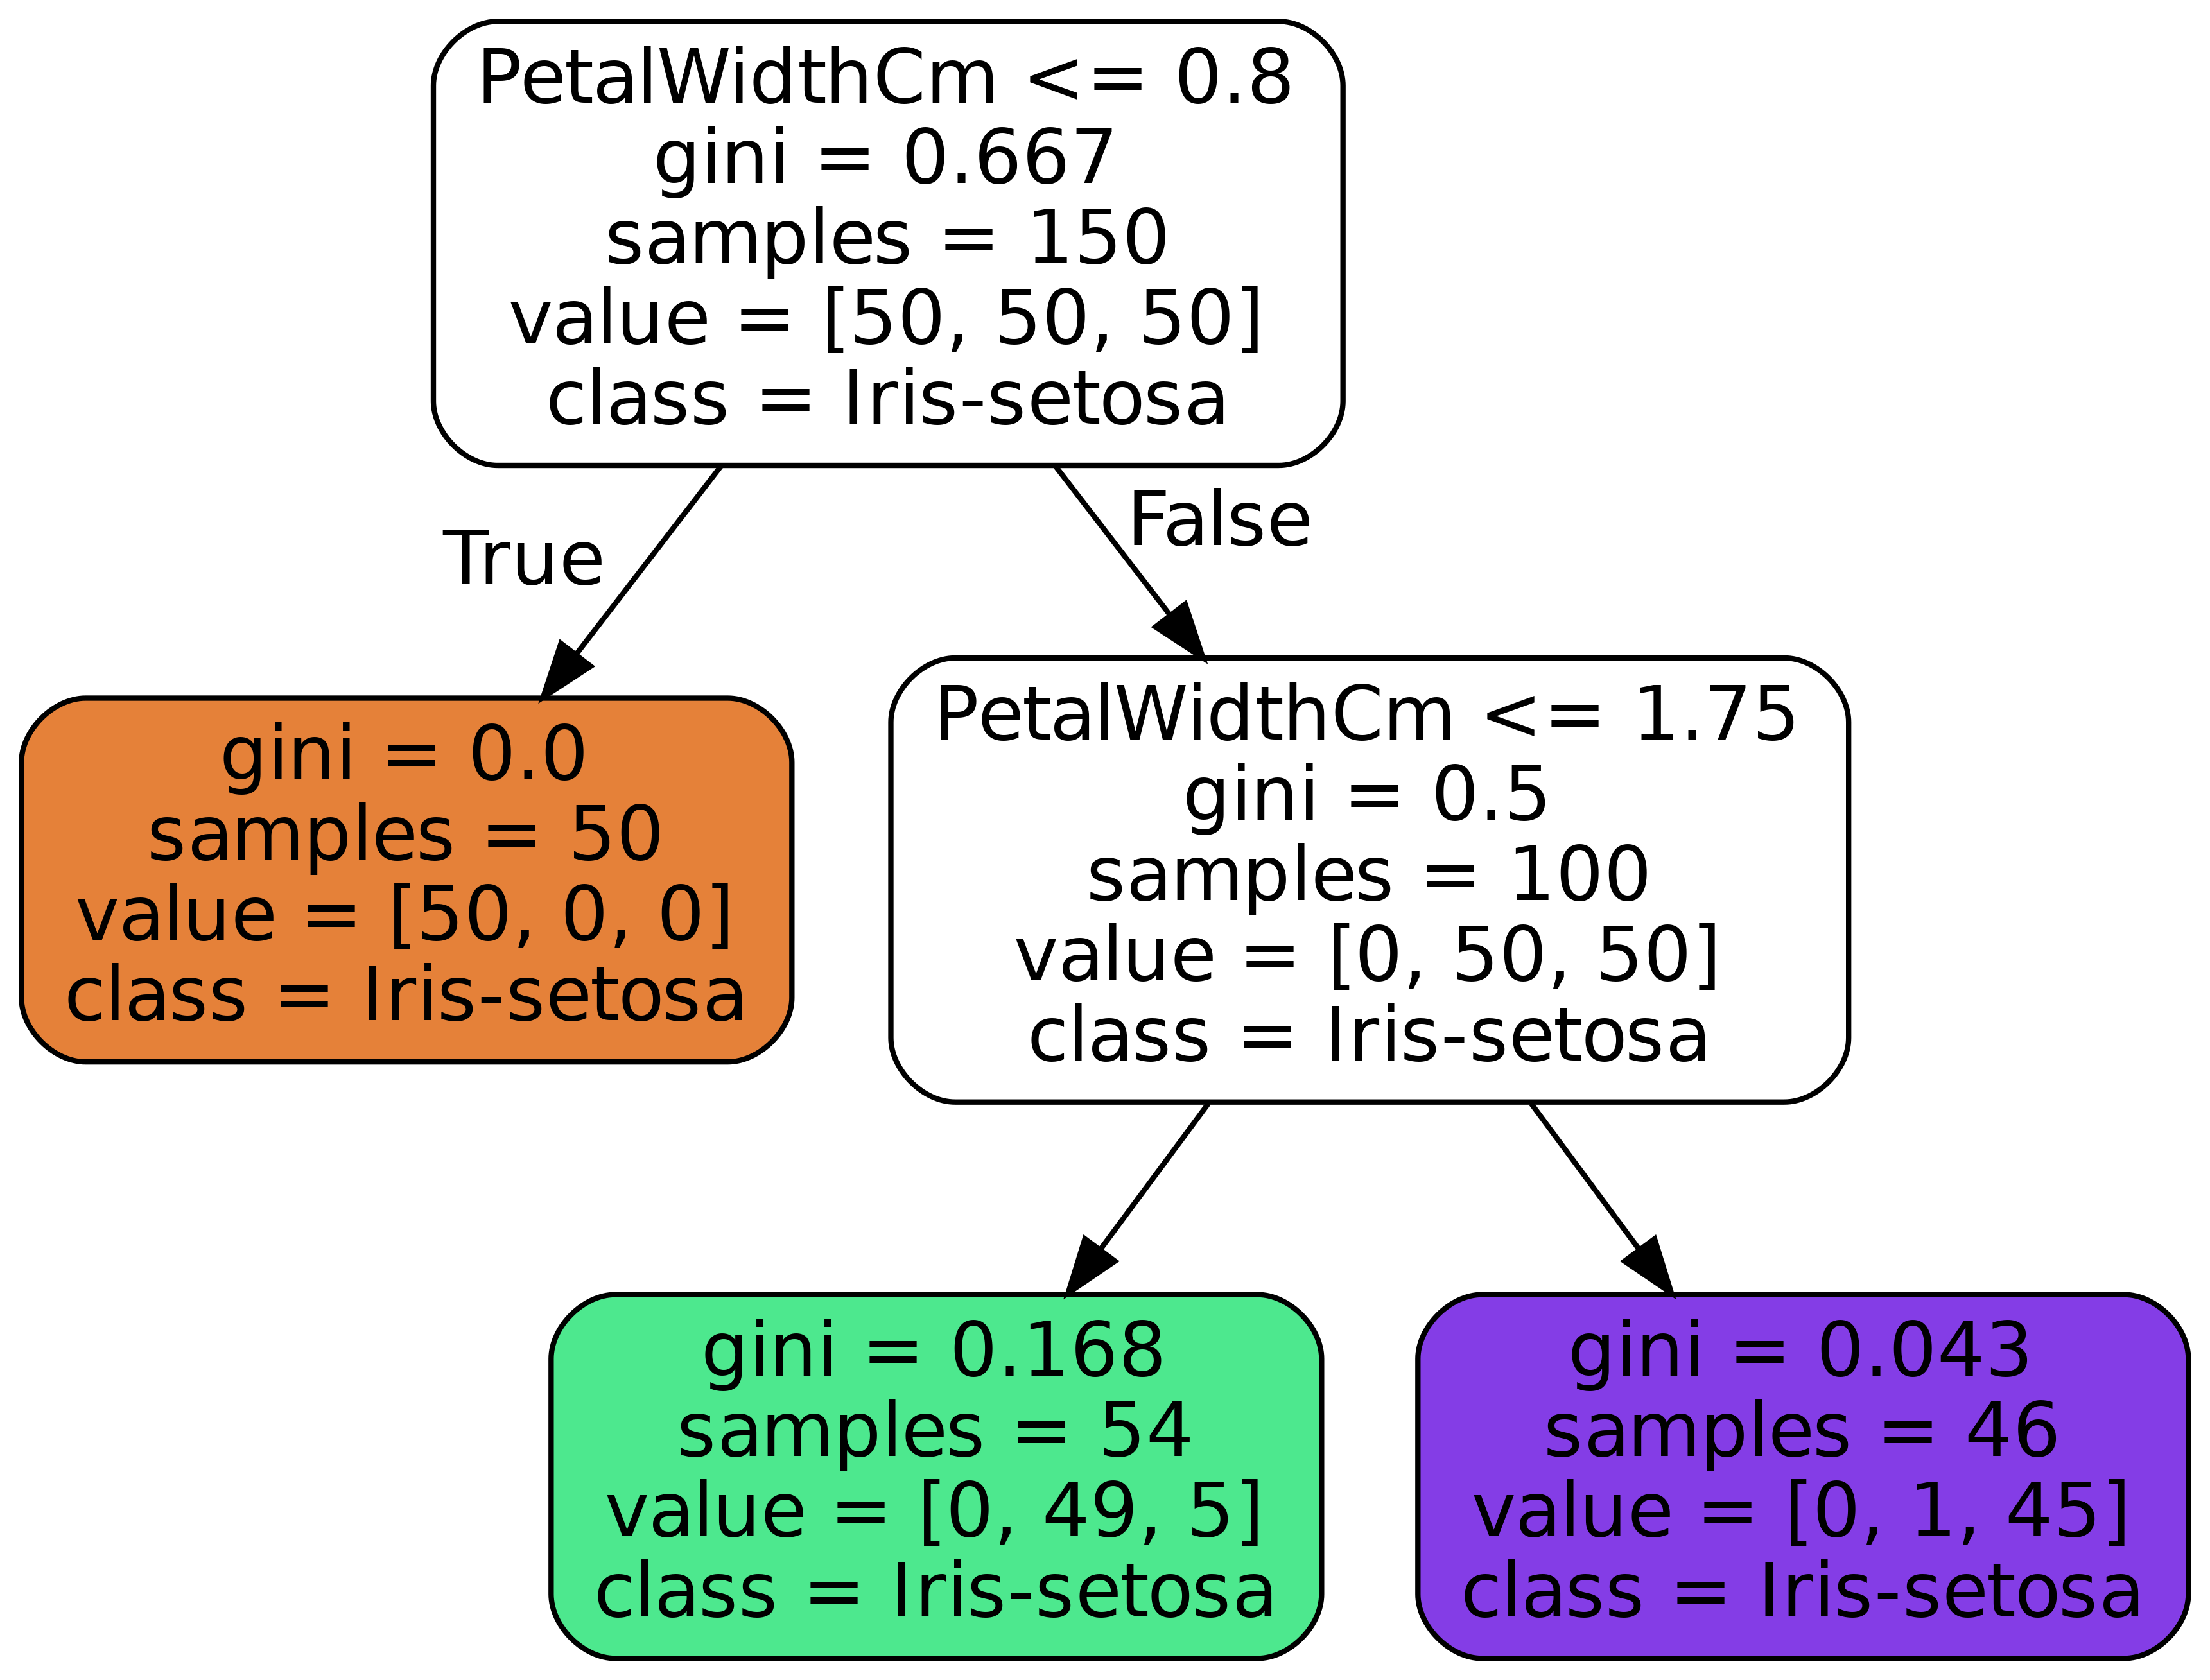

In [42]:
print('For Petal model trained for depth of 2')
Image(filename = 'tree.png',width = 500, height = 250)
